Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings

Suppress warnings and set plot style

In [ ]:
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

Load dataset

In [ ]:
data = pd.read_csv('obesity_data.csv')

Display first few rows of the data to understand the structure

In [ ]:
print(data.head())

   Age  Gender      Height     Weight        BMI  PhysicalActivityLevel  \
0   56    Male  173.575262  71.982051  23.891783                      4   
1   69    Male  164.127306  89.959256  33.395209                      2   
2   46  Female  168.072202  72.930629  25.817737                      4   
3   32    Male  168.459633  84.886912  29.912247                      3   
4   60    Male  183.568568  69.038945  20.487903                      3   

  ObesityCategory  
0   Normal weight  
1           Obese  
2      Overweight  
3      Overweight  
4   Normal weight  


Select relevant columns for visualization

In [ ]:
data[['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']]

,Age,Height,Weight,BMI,PhysicalActivityLevel
0,56,173.575262,71.982051,23.891783,4
1,69,164.127306,89.959256,33.395209,2
2,46,168.072202,72.930629,25.817737,4
3,32,168.459633,84.886912,29.912247,3
4,60,183.568568,69.038945,20.487903,3
...,...,...,...,...,...
995,18,155.588674,64.103182,26.480345,4
996,35,165.076490,97.639771,35.830783,1
997,49,156.570956,78.804284,32.146036,1
998,64,164.192222,57.978115,21.505965,4


Plot histogram of Age distribution

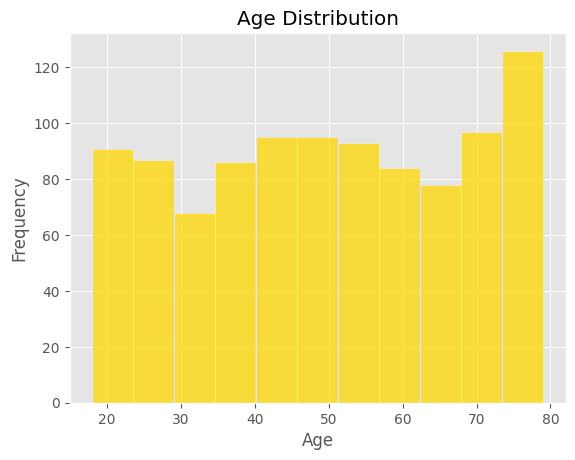

In [ ]:
sns.histplot(data.Age, color='gold')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Box plot for Age

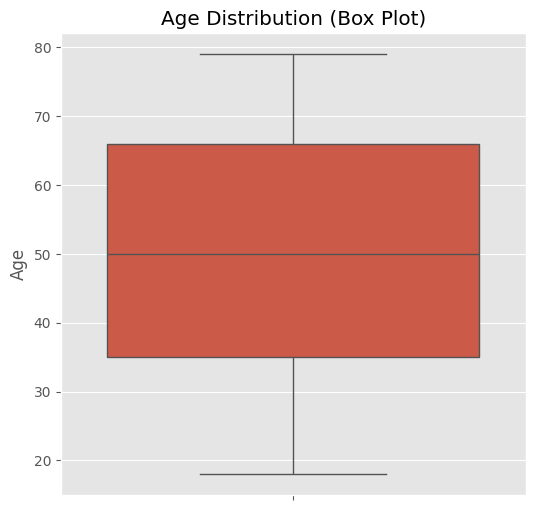

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=data, y='Age')
plt.title("Age Distribution (Box Plot)")
plt.show()

Pie chart of average age distribution by obesity category

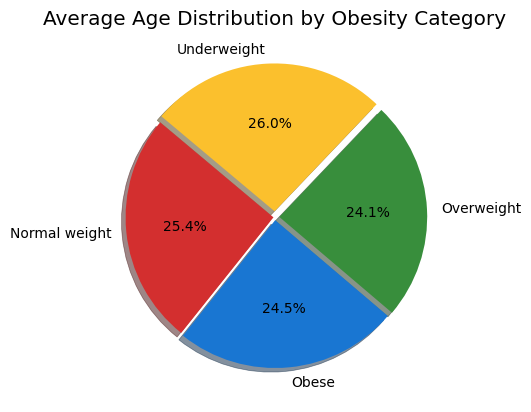

In [ ]:
data.groupby('ObesityCategory').Age.mean().plot.pie(
    autopct='%1.1f%%',
    explode=[0.01, 0.02, 0.03, 0.04],
    colors=['#d32f2f', '#1976d2', '#388e3c', '#fbc02d'],
    startangle=140,
    shadow=True,
)
plt.ylabel('')
plt.title('Average Age Distribution by Obesity Category')
plt.show()

Check for missing values

In [ ]:
print("Missing values in each column:\n", data.isna().sum())

Missing values in each column:
 Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64


Bar plot of obesity category distribution

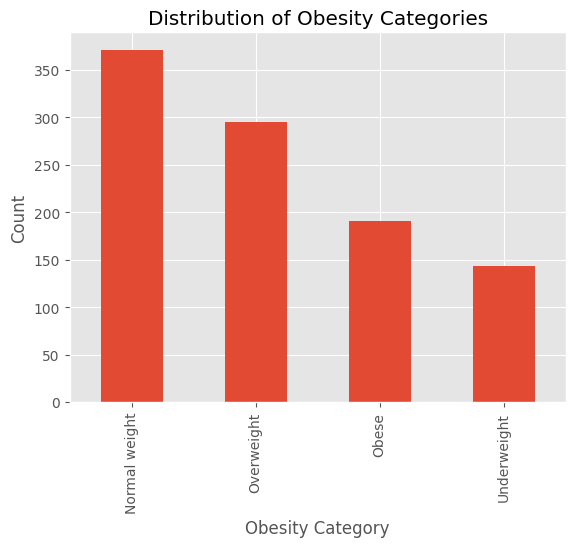

In [ ]:
data.ObesityCategory.value_counts().plot.bar()
plt.title("Distribution of Obesity Categories")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.show()

Count plot for Obesity Category by Gender

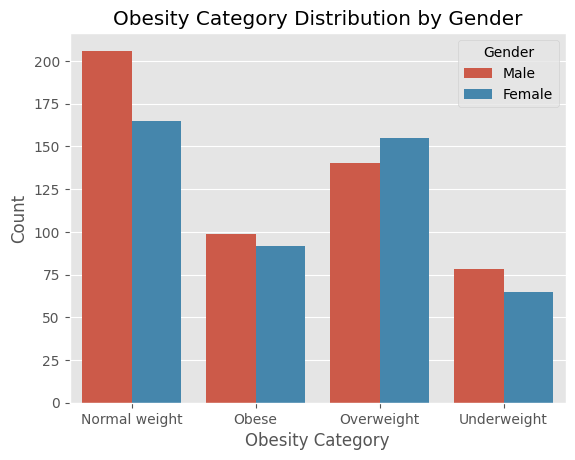

In [ ]:
sns.countplot(data=data, x='ObesityCategory', hue='Gender')
plt.title("Obesity Category Distribution by Gender")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.show()

Create a new feature: Height to Weight Ratio

In [ ]:
data['Height_Weight_Ratio'] = data['Height'] / data['Weight']

Box plots for Height, Weight, BMI, and Height_Weight_Ratio

In [ ]:
plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

Height plots

Text(0.5, 1.0, 'Height Distribution (Box Plot)')

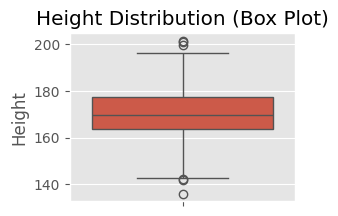

In [ ]:
plt.subplot(2, 2, 1)
sns.boxplot(data=data, y='Height')
plt.title("Height Distribution (Box Plot)")

Weight plots

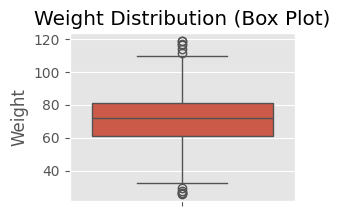

In [ ]:
plt.subplot(2, 2, 2)
sns.boxplot(data=data, y='Weight')
plt.title("Weight Distribution (Box Plot)")

plt.show()

Map categorical values to numerical values for model training

In [ ]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['ObesityCategory'] = data['ObesityCategory'].map({
    'Normal weight': 0, 'Overweight': 1, 'Obese': 2, 'Underweight': 3
})

Display sample of the updated data

In [ ]:
print(data.sample(3))

     Age  Gender      Height     Weight        BMI  PhysicalActivityLevel  \
195   66       0  158.926805  64.871684  25.683894                      3   
636   31       1  159.894059  62.887313  24.597920                      1   
595   72       1  180.261543  91.455199  28.145063                      3   

     ObesityCategory  Height_Weight_Ratio  
195                1             2.449864  
636                0             2.542549  
595                1             1.971037  


Pairplot to visualize relationships between features and target variable

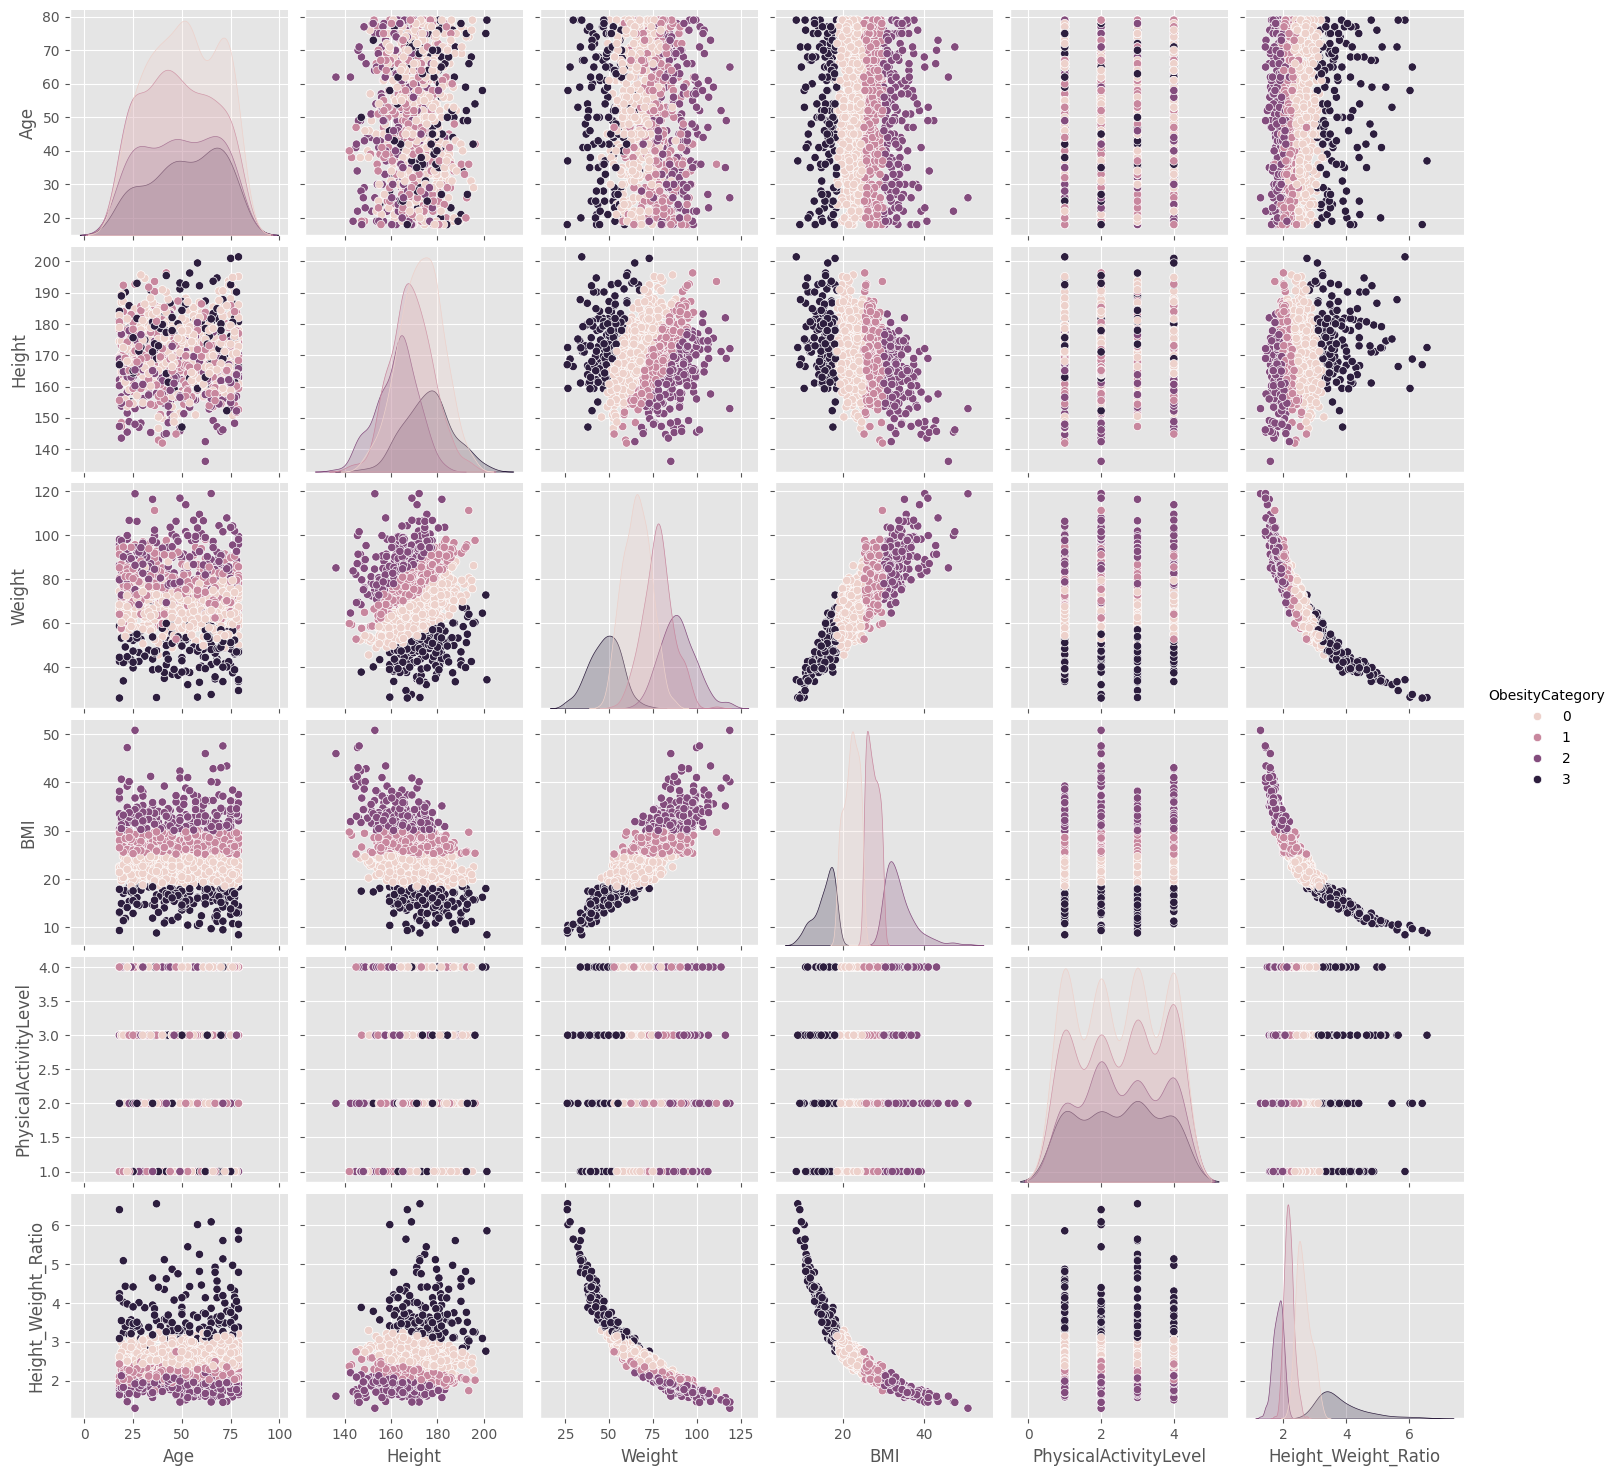

In [ ]:
sns.pairplot(data[['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel', 'Height_Weight_Ratio', 'ObesityCategory']],
             hue='ObesityCategory')
plt.show()

Split data into features (X) and target (Y)

In [ ]:
X = data.drop(columns='ObesityCategory')
Y = data['ObesityCategory']

Standardize the feature data

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Split data into training and testing sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=87)

Logistic Regression Model

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
pred1 = model1.predict(X_test)

Accuracy and confusion matrix for Logistic Regression

Logistic Regression Accuracy: 0.98


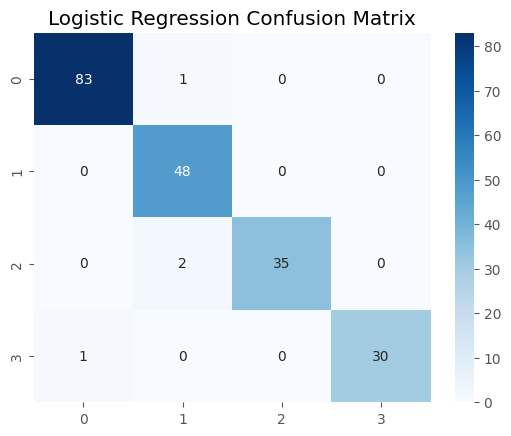

In [ ]:
print(f"Logistic Regression Accuracy: {accuracy_score(Y_test, pred1):.2f}")
sns.heatmap(confusion_matrix(Y_test, pred1), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Decision Tree Model

In [ ]:
model2 = DecisionTreeClassifier(max_depth=5)
model2.fit(X_train, Y_train)
pred2 = model2.predict(X_test)

Accuracy and confusion matrix for Decision Tree

Decision Tree Accuracy: 0.99


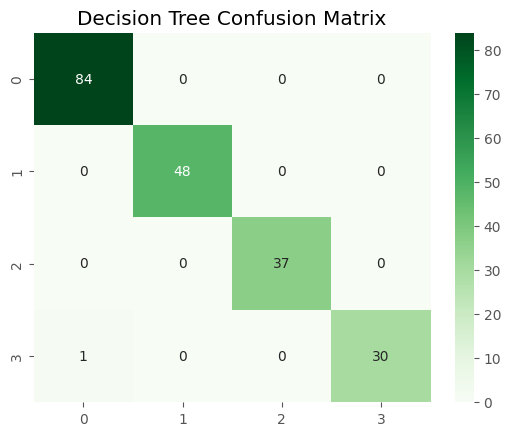

In [ ]:
print(f"Decision Tree Accuracy: {accuracy_score(Y_test, pred2):.2f}")
sns.heatmap(confusion_matrix(Y_test, pred2), annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.show()

Comparison of model performance with confusion matrices

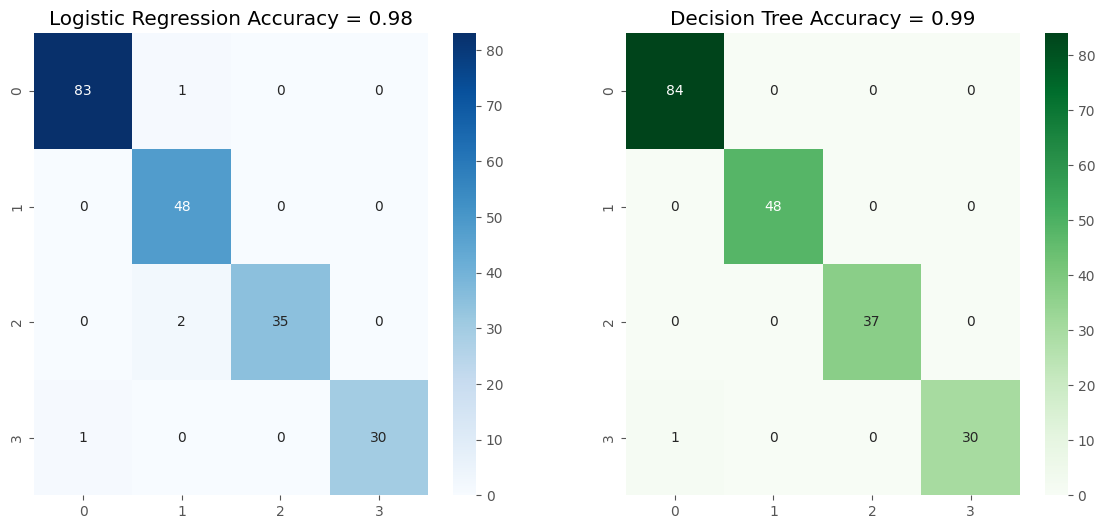

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(Y_test, pred1), annot=True, fmt="d", cmap="Blues")
plt.title(f"Logistic Regression Accuracy = {accuracy_score(Y_test, pred1):.2f}")
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(Y_test, pred2), annot=True, fmt="d", cmap="Greens")
plt.title(f"Decision Tree Accuracy = {accuracy_score(Y_test, pred2):.2f}")
plt.show()

Classification report for both models

In [ ]:
print("Logistic Regression Classification Report:\n", classification_report(Y_test, pred1))
print("Decision Tree Classification Report:\n", classification_report(Y_test, pred2))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.94      1.00      0.97        48
           2       1.00      0.95      0.97        37
           3       1.00      0.97      0.98        31

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        84
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        37
           3       1.00      0.97      0.98        31

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

